Column Names: Index(['Hours_Studied', 'Review_Session', 'Results'], dtype='object')
Fixing column names...
Dataset Head:
   hours_studied  review_session  passed
0       3.745401               0       0
1       9.507143               1       1
2       7.319939               0       1
3       5.986585               0       1
4       1.560186               1       1


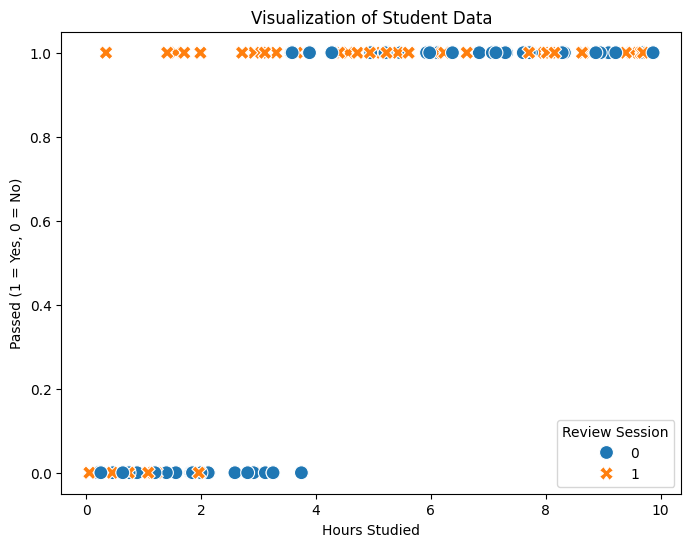

Intercept: -4.61373891595663
Coefficients: [1.36542016 1.87797591]
Accuracy: 0.9300
AUC Score: 0.9761


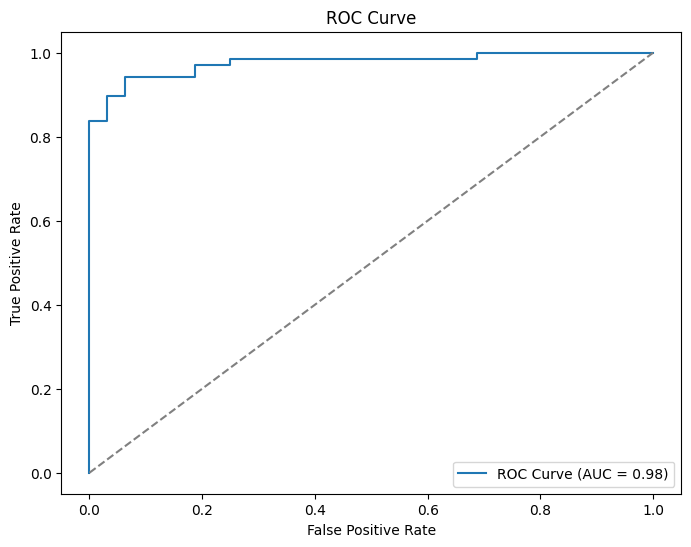

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv('/Users/yashsoni/Documents/student_data.csv')

# Fix column names
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
print("Column Names:", data.columns)  # Debugging step

# Ensure correct column names are used
if 'hours_studied' not in data.columns:
    print("Fixing column names...")
    data.rename(columns={'Hours_Studied': 'hours_studied', 'Review_Session': 'review_session', 'Results': 'passed'}, inplace=True)

# Display dataset info
print("Dataset Head:")
print(data.head())

# Visualizing the dataset
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['hours_studied'], y=data['passed'], hue=data['review_session'], style=data['review_session'], s=100)
plt.xlabel('Hours Studied')
plt.ylabel('Passed (1 = Yes, 0 = No)')
plt.title('Visualization of Student Data')
plt.legend(title='Review Session')
plt.show()

# Define features and target variable
X = data[['hours_studied', 'review_session']]
y = data['passed']

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get model coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

# Make predictions
predictions = model.predict(X)
predicted_probs = model.predict_proba(X)[:,1]  # Probabilities for class 1

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate AUC score
auc = roc_auc_score(y, predicted_probs)
print(f"AUC Score: {auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, predicted_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('/Users/yashsoni/Documents/student_data.csv')

# Fix column names
data.columns = data.columns.str.strip()
if 'hours_studied' not in data.columns:
    data.rename(columns={'Hours_Studied': 'hours_studied', 'Review_Session': 'review_session', 'Results': 'passed'}, inplace=True)

# Define features and target variable
X = data[['hours_studied', 'review_session']]
y = data['passed']

# Train SVM with linear kernel
linear_svm = SVC(kernel='linear', probability=True)
linear_svm.fit(X, y)

# Predictions and accuracy
linear_predictions = linear_svm.predict(X)
linear_accuracy = accuracy_score(y, linear_predictions)
print(f"Linear SVM Accuracy: {linear_accuracy:.4f}")
print("Linear SVM Classification Report:\n", classification_report(y, linear_predictions))

# Train SVM with RBF kernel and use GridSearchCV to find best gamma
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100]}
rbf_svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=5)
rbf_svm.fit(X, y)

# Best parameters from GridSearchCV
print("Best parameters for RBF SVM:", rbf_svm.best_params_)

# Predictions and accuracy for best RBF model
rbf_predictions = rbf_svm.best_estimator_.predict(X)
rbf_accuracy = accuracy_score(y, rbf_predictions)
print(f"RBF SVM Accuracy: {rbf_accuracy:.4f}")
print("RBF SVM Classification Report:\n", classification_report(y, rbf_predictions))


Linear SVM Accuracy: 0.9200
Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100

Best parameters for RBF SVM: {'C': 1, 'gamma': 0.1}
RBF SVM Accuracy: 0.9300
RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

